In [0]:
import pandas as pd
import tensorflow as tf
import numpy as np
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [13]:
df = pd.read_csv('/UCI_data.csv',parse_dates=['date'])
df = df.set_index('date')
df['hour'] = df.index.hour
df = df.resample('1H').mean()
#df.reset_index(drop=True, inplace=True)
df

,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,TARGET_energy,hour
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,19.890000,46.502778,19.200000,44.626528,19.790000,44.897778,18.932778,45.738750,17.166667,55.116667,6.586667,84.260000,17.177778,41.400000,18.150000,48.710556,17.016667,45.446667,6.308333,733.750000,92.000000,6.166667,53.416667,5.050000,26.823044,26.823044,90.000000,17.0
2016-01-11 18:00:00,19.897778,45.879028,19.268889,44.438889,19.770000,44.863333,18.908333,46.066667,17.111111,54.977778,6.180000,87.204444,17.229583,42.046806,18.094444,48.597222,16.981667,45.290000,5.941667,734.266667,91.583333,5.416667,40.000000,4.658333,22.324206,22.324206,228.333333,18.0
2016-01-11 19:00:00,20.495556,52.805556,19.925556,46.061667,20.052222,47.227361,18.969444,47.815556,17.136111,55.869861,5.857361,88.131389,17.850000,45.017778,18.156111,49.213333,16.902222,45.311389,6.000000,734.791667,89.750000,6.000000,40.000000,4.391667,33.734932,33.734932,198.333333,19.0
2016-01-11 20:00:00,20.961111,48.453333,20.251111,45.632639,20.213889,47.268889,19.190833,49.227917,17.615556,74.027778,5.469444,86.933889,17.632222,42.920000,18.773333,50.195556,16.890000,45.118889,6.000000,735.283333,87.583333,6.000000,40.000000,4.016667,25.679642,25.679642,160.000000,20.0
2016-01-11 21:00:00,21.311667,45.768333,20.587778,44.961111,20.373333,46.164444,19.425556,47.918889,18.427222,69.037778,5.578889,86.129444,17.863611,43.618333,19.153333,49.542222,16.890000,44.807778,5.833333,735.566667,87.416667,6.000000,40.000000,3.816667,18.826274,18.826274,126.666667,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-27 14:00:00,25.544444,46.638889,26.421369,41.205054,28.397778,41.160000,24.666667,45.883889,22.890000,53.052222,25.567222,1.000000,23.968048,43.342905,23.848333,49.253056,23.100000,46.594444,21.916667,755.800000,59.000000,2.000000,21.583333,13.475000,27.553946,27.553946,103.333333,14.0
2016-05-27 15:00:00,25.500000,45.677639,26.154762,41.041238,28.240000,40.306667,24.694444,45.270000,23.007500,52.368611,26.279444,1.000000,24.045238,43.189905,23.926667,48.883333,23.138889,46.590000,22.216667,755.675000,57.333333,2.000000,21.833333,13.258333,25.429025,25.429025,76.666667,15.0
2016-05-27 16:00:00,25.487778,46.250000,26.000000,41.736190,27.953333,40.607778,24.700000,45.476667,23.150000,52.094444,26.138889,1.000000,24.353333,44.330905,24.271444,50.785667,23.193333,46.645381,22.883333,755.375000,55.000000,2.416667,22.583333,13.283333,23.229344,23.229344,135.000000,16.0


In [14]:
energyhr = pd.concat([df, pd.get_dummies(df['hour'],drop_first=True)], axis=1)
energyhr

,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,TARGET_energy,hour,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,19.890000,46.502778,19.200000,44.626528,19.790000,44.897778,18.932778,45.738750,17.166667,55.116667,6.586667,84.260000,17.177778,41.400000,18.150000,48.710556,17.016667,45.446667,6.308333,733.750000,92.000000,6.166667,53.416667,5.050000,26.823044,26.823044,90.000000,17.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2016-01-11 18:00:00,19.897778,45.879028,19.268889,44.438889,19.770000,44.863333,18.908333,46.066667,17.111111,54.977778,6.180000,87.204444,17.229583,42.046806,18.094444,48.597222,16.981667,45.290000,5.941667,734.266667,91.583333,5.416667,40.000000,4.658333,22.324206,22.324206,228.333333,18.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2016-01-11 19:00:00,20.495556,52.805556,19.925556,46.061667,20.052222,47.227361,18.969444,47.815556,17.136111,55.869861,5.857361,88.131389,17.850000,45.017778,18.156111,49.213333,16.902222,45.311389,6.000000,734.791667,89.750000,6.000000,40.000000,4.391667,33.734932,33.734932,198.333333,19.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2016-01-11 20:00:00,20.961111,48.453333,20.251111,45.632639,20.213889,47.268889,19.190833,49.227917,17.615556,74.027778,5.469444,86.933889,17.632222,42.920000,18.773333,50.195556,16.890000,45.118889,6.000000,735.283333,87.583333,6.000000,40.000000,4.016667,25.679642,25.679642,160.000000,20.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2016-01-11 21:00:00,21.311667,45.768333,20.587778,44.961111,20.373333,46.164444,19.425556,47.918889,18.427222,69.037778,5.578889,86.129444,17.863611,43.618333,19.153333,49.542222,16.890000,44.807778,5.833333,735.566667,87.416667,6.000000,40.000000,3.816667,18.826274,18.826274,126.666667,21.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-27 14:00:00,25.544444,46.638889,26.421369,41.205054,28.397778,41.160000,24.666667,45.883889,22.890000,53.052222,25.567222,1.000000,23.968048,43.342905,23.848333,49.253056,23.100000,46.594444,21.916667,755.800000,59.000000,2.000000,21.583333,13.475000,27.553946,27.553946,103.333333,14.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2016-05-27 15:00:00,25.500000,45.677639,26.154762,41.041238,28.240000,40.306667,24.694444,45.270000,23.007500,52.368611,26.279444,1.000000,24.045238,43.189905,23.926667,48.883333,23.138889,46.590000,22.216667,755.675000,57.333333,2.000000,21.833333,13.258333,25.429025,25.429025,76.666667,15.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2016-05-27 16:00:00,25.487778,46.250000,26.000000,41.736190,27.953333,40.607778,24.700000,45.476667,23.150000,52.094444,26.138889,1.000000,24.353333,44.330905,24.271444,50.785667,23.193333,46.645381,22.883333,755.375000,55.000000,2.416667,22.583333,13.283333,23.229344,23.229344,135.000000,16.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [16]:
energyhr.reset_index(drop=True, inplace=True)
energyhr=energyhr.drop(['hour'],axis=1)
energyhr

,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,TARGET_energy,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0
0,19.890000,46.502778,19.200000,44.626528,19.790000,44.897778,18.932778,45.738750,17.166667,55.116667,6.586667,84.260000,17.177778,41.400000,18.150000,48.710556,17.016667,45.446667,6.308333,733.750000,92.000000,6.166667,53.416667,5.050000,26.823044,26.823044,90.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,19.897778,45.879028,19.268889,44.438889,19.770000,44.863333,18.908333,46.066667,17.111111,54.977778,6.180000,87.204444,17.229583,42.046806,18.094444,48.597222,16.981667,45.290000,5.941667,734.266667,91.583333,5.416667,40.000000,4.658333,22.324206,22.324206,228.333333,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,20.495556,52.805556,19.925556,46.061667,20.052222,47.227361,18.969444,47.815556,17.136111,55.869861,5.857361,88.131389,17.850000,45.017778,18.156111,49.213333,16.902222,45.311389,6.000000,734.791667,89.750000,6.000000,40.000000,4.391667,33.734932,33.734932,198.333333,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,20.961111,48.453333,20.251111,45.632639,20.213889,47.268889,19.190833,49.227917,17.615556,74.027778,5.469444,86.933889,17.632222,42.920000,18.773333,50.195556,16.890000,45.118889,6.000000,735.283333,87.583333,6.000000,40.000000,4.016667,25.679642,25.679642,160.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,21.311667,45.768333,20.587778,44.961111,20.373333,46.164444,19.425556,47.918889,18.427222,69.037778,5.578889,86.129444,17.863611,43.618333,19.153333,49.542222,16.890000,44.807778,5.833333,735.566667,87.416667,6.000000,40.000000,3.816667,18.826274,18.826274,126.666667,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3285,25.544444,46.638889,26.421369,41.205054,28.397778,41.160000,24.666667,45.883889,22.890000,53.052222,25.567222,1.000000,23.968048,43.342905,23.848333,49.253056,23.100000,46.594444,21.916667,755.800000,59.000000,2.000000,21.583333,13.475000,27.553946,27.553946,103.333333,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3286,25.500000,45.677639,26.154762,41.041238,28.240000,40.306667,24.694444,45.270000,23.007500,52.368611,26.279444,1.000000,24.045238,43.189905,23.926667,48.883333,23.138889,46.590000,22.216667,755.675000,57.333333,2.000000,21.833333,13.258333,25.429025,25.429025,76.666667,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3287,25.487778,46.250000,26.000000,41.736190,27.953333,40.607778,24.700000,45.476667,23.150000,52.094444,26.138889,1.000000,24.353333,44.330905,24.271444,50.785667,23.193333,46.645381,22.883333,755.375000,55.000000,2.416667,22.583333,13.283333,23.229344,23.229344,135.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3288,25.533333,46.783333,25.772190,42.495476,27.164444,41.247778,24.700000,45.658889,23.210000,52.296667,24.441111,1.000000,24.516190,44.515381,24.671528,50.058514,23.200000,46.780655,22.666667,755.200000,55.833333,3.416667,24.083333,13.316667,27.186003,27.186003,183.333333,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [0]:
df.dtypes

T1               float64
RH_1             float64
T2               float64
RH_2             float64
T3               float64
RH_3             float64
T4               float64
RH_4             float64
T5               float64
RH_5             float64
T6               float64
RH_6             float64
T7               float64
RH_7             float64
T8               float64
RH_8             float64
T9               float64
RH_9             float64
T_out            float64
Press_mm_hg      float64
RH_out           float64
Windspeed        float64
Visibility       float64
Tdewpoint        float64
rv1              float64
rv2              float64
TARGET_energy    float64
hour             float64
dtype: object

In [0]:
df.isnull().sum()

T1               0
RH_1             0
T2               0
RH_2             0
T3               0
RH_3             0
T4               0
RH_4             0
T5               0
RH_5             0
T6               0
RH_6             0
T7               0
RH_7             0
T8               0
RH_8             0
T9               0
RH_9             0
T_out            0
Press_mm_hg      0
RH_out           0
Windspeed        0
Visibility       0
Tdewpoint        0
rv1              0
rv2              0
TARGET_energy    0
hour             0
dtype: int64

In [0]:
df.shape

(3290, 28)

In [0]:
from sklearn import preprocessing

partial_data = df

x = partial_data.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
complete_normalized_data = pd.DataFrame(x_scaled)

train_data= complete_normalized_data[1:1501]
test_data = complete_normalized_data[1502:3002]

print(f'Training data: {len(train_data)} Test data: {len(test_data)}')

Training data: 1500 Test data: 1500


In [0]:
target = train_data.pop(train_data.columns[len(train_data.columns)-1])
dataset = tf.data.Dataset.from_tensor_slices((train_data.values, target.values))
train_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26
1,0.330146,0.693962,0.232532,0.712017,0.215255,0.766894,0.344809,0.787553,0.173603,0.383167,0.355436,0.871632,0.172990,0.671664,0.159869,0.650999,0.217655,0.671838,0.352904,0.113897,0.887402,0.397351,0.600000,0.512466,0.444954,0.444954,0.336134
2,0.393650,0.955627,0.280717,0.761334,0.239314,0.886461,0.350342,0.866934,0.176064,0.396956,0.345965,0.881005,0.231986,0.778338,0.165566,0.672268,0.209388,0.672732,0.354792,0.126142,0.862876,0.443709,0.600000,0.500192,0.742484,0.742484,0.285714
3,0.443107,0.791213,0.304607,0.748295,0.253096,0.888561,0.370387,0.931040,0.223258,0.677624,0.334577,0.868897,0.211277,0.703016,0.222591,0.706174,0.208117,0.664685,0.354792,0.137609,0.833891,0.443709,0.600000,0.482931,0.532446,0.532446,0.221289
4,0.480347,0.689781,0.329311,0.727887,0.266689,0.832701,0.391639,0.871624,0.303155,0.600493,0.337790,0.860763,0.233280,0.728090,0.257699,0.683621,0.208117,0.651679,0.349398,0.144218,0.831661,0.443709,0.600000,0.473725,0.353747,0.353747,0.165266
5,0.508026,0.648037,0.352629,0.702292,0.274882,0.815758,0.453508,0.852914,0.370652,0.354595,0.345161,0.851935,0.224854,0.703894,0.275202,0.665479,0.204648,0.639968,0.345891,0.154519,0.833891,0.476821,0.600000,0.470272,0.570621,0.570621,0.436975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1496,0.442635,0.296016,0.124215,0.550761,0.258732,0.363511,0.422825,0.248934,0.323444,0.330699,0.216762,0.628391,0.587254,0.365865,0.624662,0.345510,0.457856,0.404478,0.216957,0.923421,0.847269,0.112583,0.953846,0.298044,0.491805,0.491805,0.033613
1497,0.420149,0.297401,0.104566,0.555505,0.261005,0.366658,0.415481,0.249287,0.311413,0.318385,0.190810,0.647816,0.579066,0.383299,0.613836,0.384396,0.457856,0.413419,0.208056,0.918367,0.845039,0.205298,0.953846,0.284618,0.398475,0.398475,0.030812
1498,0.405925,0.292175,0.086955,0.565230,0.268109,0.367782,0.405295,0.242580,0.305507,0.309388,0.175455,0.662813,0.571512,0.387049,0.599952,0.397843,0.457856,0.423382,0.183510,0.914091,0.852843,0.205298,0.953846,0.254315,0.726318,0.726318,0.019608
1499,0.389577,0.288922,0.070118,0.570498,0.269151,0.369946,0.397272,0.237032,0.296757,0.302284,0.164963,0.667846,0.560682,0.387468,0.589918,0.402660,0.457856,0.435436,0.164898,0.910010,0.863991,0.205298,0.947436,0.236287,0.470182,0.470182,0.036415


In [0]:
for f, t in dataset.take(5):
  print ('Features: {}, Target: {}'.format(f, t))

Features: [0.33014636 0.69396246 0.23253159 0.71201661 0.21525477 0.76689427
 0.344809   0.78755312 0.17360276 0.383167   0.35543615 0.8716324
 0.17298989 0.67166405 0.1598686  0.65099948 0.21765522 0.67183799
 0.35290415 0.11389699 0.88740245 0.39735099 0.6        0.51246644
 0.44495404 0.44495404 0.33613445], Target: 0.7826086956521738
Features: [0.39364967 0.9556275  0.28071749 0.76133371 0.23931405 0.8864607
 0.35034204 0.86693386 0.17606366 0.39695597 0.34596469 0.88100494
 0.23198563 0.77833778 0.16556597 0.67226765 0.20938837 0.67273213
 0.3547923  0.12614189 0.86287625 0.44370861 0.6        0.50019179
 0.74248416 0.74248416 0.28571429], Target: 0.8260869565217391
Features: [0.4431067  0.7912126  0.3046066  0.74829532 0.25309604 0.88856107
 0.37038674 0.93103987 0.22325823 0.67762351 0.33457691 0.86889675
 0.21127703 0.70301638 0.22259102 0.70617397 0.20811655 0.66468484
 0.3547923  0.13760933 0.83389075 0.44370861 0.6        0.48293057
 0.53244569 0.53244569 0.22128852], Target

In [0]:
train_dataset = dataset.shuffle(len(train_data)).batch(1)

In [0]:
model = tf.keras.Sequential([
  tf.keras.layers.Dense(30, activation='elu'),
  tf.keras.layers.Dense(15, activation='elu'),
  tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam',loss=tf.keras.losses.MeanSquaredError())

In [0]:
history = model.fit(train_dataset,epochs=20)
loss = history.history['loss']

Epoch 1/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0751
Epoch 2/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0570
Epoch 3/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0505
Epoch 4/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0495
Epoch 5/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0466
Epoch 6/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0465
Epoch 7/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0457
Epoch 8/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0448
Epoch 9/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0436
Epoch 10/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.0433
Epoch 11/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0436
Epoch 12/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0415
E

In [0]:
test_target = test_data.pop(test_data.columns[len(test_data.columns)-1])
test_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26
1502,0.350449,0.299185,0.031390,0.578822,0.265268,0.374751,0.373028,0.210908,0.296013,0.268618,0.148890,0.686239,0.530702,0.362335,0.554095,0.385644,0.457856,0.460216,0.156806,0.918562,0.874025,0.331126,0.914103,0.228999,0.712471,0.712471,0.030812
1503,0.341006,0.276603,0.033795,0.545561,0.256174,0.342437,0.365684,0.184380,0.297584,0.246875,0.169608,0.688115,0.499137,0.257930,0.532918,0.281775,0.463059,0.434611,0.176767,0.924004,0.838350,0.350993,0.935897,0.238588,0.431965,0.431965,0.344538
1504,0.341006,0.260212,0.134071,0.489634,0.251912,0.308298,0.403359,0.195803,0.283249,0.257905,0.209324,0.637024,0.481070,0.212629,0.515621,0.249724,0.477685,0.362883,0.212911,0.922060,0.777035,0.476821,0.966667,0.255850,0.377956,0.377956,0.215686
1505,0.348088,0.226233,0.272075,0.371339,0.275734,0.299784,0.450138,0.155886,0.273679,0.245518,0.263580,0.533291,0.474097,0.186957,0.496732,0.193302,0.470170,0.366204,0.247977,0.918367,0.712375,0.456954,0.984615,0.265056,0.691639,0.691639,0.770308
1506,0.387099,0.297412,0.352711,0.372048,0.390206,0.351064,0.472522,0.192298,0.270945,0.228167,0.301421,0.458915,0.497499,0.173827,0.482206,0.144495,0.468262,0.397098,0.270635,0.916035,0.682274,0.397351,0.696154,0.278097,0.779062,0.779062,0.305322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2997,0.701782,0.279478,0.534210,0.345562,0.591962,0.255135,0.790822,0.190332,0.772968,0.108805,0.629986,0.000000,0.801050,0.150753,0.850776,0.175093,0.843913,0.230007,0.571120,0.753158,0.312152,0.331126,0.600000,0.395474,0.783241,0.783241,0.103641
2998,0.712819,0.281283,0.527256,0.350901,0.592910,0.228543,0.791325,0.201950,0.772422,0.104940,0.624029,0.000000,0.806332,0.140061,0.859783,0.158540,0.837317,0.166009,0.585686,0.747133,0.304348,0.284768,0.600000,0.401611,0.552891,0.552891,0.120448
2999,0.712819,0.280842,0.497670,0.366025,0.599623,0.260817,0.807069,0.246690,0.763125,0.107815,0.586339,0.000000,0.799993,0.145771,0.873323,0.151237,0.832218,0.144042,0.600791,0.742468,0.287625,0.284768,0.600000,0.404296,0.754019,0.754019,0.232493
3000,0.712819,0.292847,0.465733,0.398322,0.600582,0.274641,0.824825,0.254633,0.759844,0.110522,0.536303,0.032098,0.788212,0.177741,0.880099,0.162039,0.823950,0.160269,0.583258,0.738776,0.319955,0.251656,0.600000,0.416187,0.351733,0.351733,0.386555


In [0]:
model.predict(test_data)

array([[0.1484622 ],
       [0.5170021 ],
       [0.5450017 ],
       ...,
       [0.88066673],
       [0.8871303 ],
       [0.8893745 ]], dtype=float32)

In [0]:
print('\nEvaluate on test data')
model.evaluate(train_data, test_data)


Evaluate on test data
47/47 [==============================] - 0s 1ms/step - loss: 0.0944


0.09439696371555328

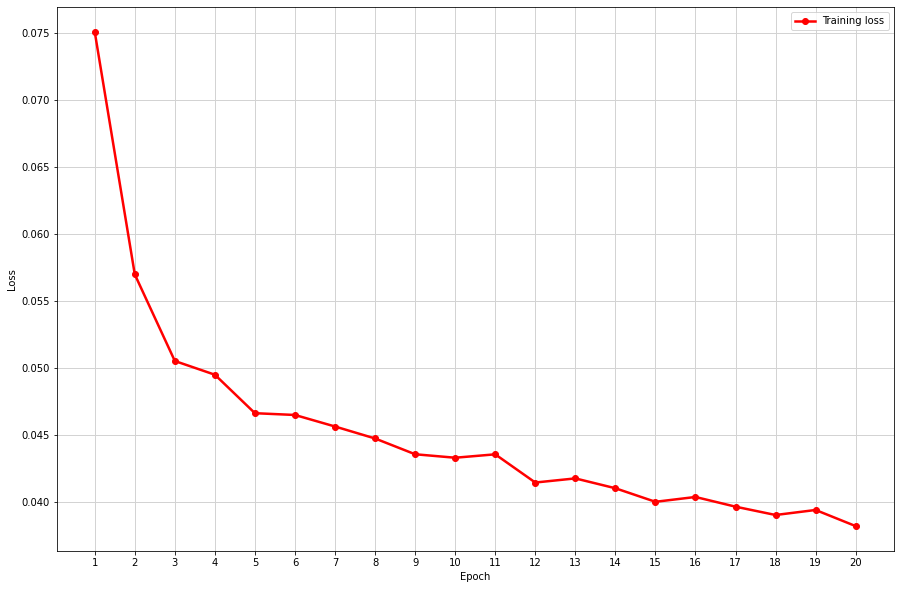

In [0]:
import matplotlib.pyplot as plt

epochs = range(1, len(loss)+1)
plt.figure(figsize=(15,10))
plt.grid(color='lightgray', linestyle='-', linewidth=1)
plt.plot(epochs, loss, 'ro', label='Training loss', color="red", linewidth=2.5, linestyle="-")
plt.legend()
plt.xlabel("Epoch")
plt.xticks(epochs)
plt.ylabel("Loss")
plt.show()